# BOAT PRICE PREDICTION

This project focuses on predicting boat prices using various machine learning algorithms. The dataset was sourced from Kaggle and involves multiple steps, including data extraction, transformation, loading (ETL), cleaning, exploratory data analysis (EDA), and model building. The primary objective is to develop and evaluate regression models to accurately predict boat prices based on various features.

## 1.0 IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# For Notebooks connections
init_notebook_mode(connected=True)

In [ ]:
# For offline use
#cf.go_offline()

##  2.0 DATA EXTRACTION,TRANSFORM AND LOAD (ETL) AND EXPLORATORY

### 2.1 LOAD, TRANSFORM THE DATASET
   + Data extracted manually form Kaggle 
   + Transform and Load by Pandas(row and columns) 
   + The url (https://www.kaggle.com/datasets/mexwell/boat-price-prediction/data?select=Boats_No_Price_dataset.csv )

In [3]:
df = pd.read_csv('Boats_Cleaned_dataset.csv')
df.head()

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,...,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
0,1,7252689,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,...,NaN,outboard-4s,16500.0,217053,Englewood,FL,34224,2019-10-16,10,2019
1,3,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,...,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,2019-09-24,9,2019
2,5,7271336,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,...,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2019-11-02,11,2019
3,6,7222952,power,power-expresscruiser,Regal,32 Express,2015,used,32.0,10.33,...,NaN,multiple,169995.0,34834,North Charleston,SC,29405,2019-09-19,9,2019
4,8,6824832,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,...,1994.0,inboard,109900.0,17942,Middle River,MD,21220,2018-08-29,8,2018


### 2.2 DATA EXPLORATORY

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18903 non-null  int64  
 1   id              18903 non-null  int64  
 2   type            18903 non-null  object 
 3   boatClass       18903 non-null  object 
 4   make            18903 non-null  object 
 5   model           18868 non-null  object 
 6   year            18903 non-null  int64  
 7   condition       18903 non-null  object 
 8   length_ft       18903 non-null  float64
 9   beam_ft         12399 non-null  float64
 10  dryWeight_lb    7094 non-null   float64
 11  hullMaterial    18903 non-null  object 
 12  fuelType        15951 non-null  object 
 13  numEngines      18903 non-null  int64  
 14  totalHP         18055 non-null  float64
 15  maxEngineYear   2205 non-null   float64
 16  minEngineYear   2174 non-null   float64
 17  engineCategory  8410 non-null  

<AxesSubplot:>

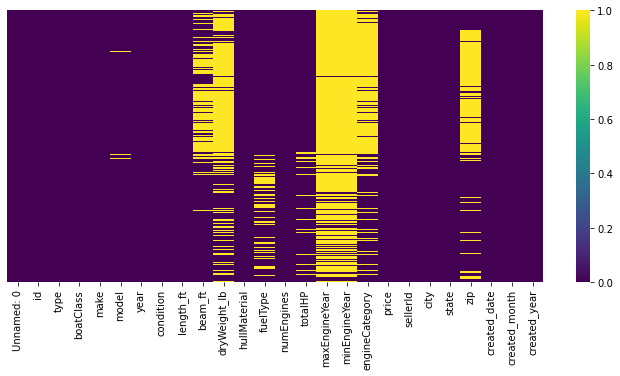

In [5]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar =True, cmap='viridis')

In [6]:
# CHECK ALL COLUMN 
df.keys()

Index(['Unnamed: 0', 'id', 'type', 'boatClass', 'make', 'model', 'year',
       'condition', 'length_ft', 'beam_ft', 'dryWeight_lb', 'hullMaterial',
       'fuelType', 'numEngines', 'totalHP', 'maxEngineYear', 'minEngineYear',
       'engineCategory', 'price', 'sellerId', 'city', 'state', 'zip',
       'created_date', 'created_month', 'created_year'],
      dtype='object')

## 3.0 DATA CLEANING AND PROCESSING

### >> 3.1 DATA CLEANING
+ DROP `'Unnamed: 0', 'id', 'created_date', 'created_month' 'sellerId', 'year'` AS IS OF NO USE

In [7]:
df.drop(['Unnamed: 0', 'id', 'created_date','created_month'], axis=1, inplace=True)
#df.drop(['Unnamed: 0', 'id', 'created_date','created_month', 'year', 'sellerId'], axis=1, inplace=True)

df.head()

,type,boatClass,make,model,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,...,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_year
0,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,3000.0,fiberglass,...,150.0,NaN,NaN,outboard-4s,16500.0,217053,Englewood,FL,34224,2019
1,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,16100.0,fiberglass,...,800.0,2018.0,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,2019
2,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,2000.0,fiberglass,...,75.0,2019.0,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2019
3,power,power-expresscruiser,Regal,32 Express,2015,used,32.0,10.33,12650.0,fiberglass,...,600.0,NaN,NaN,multiple,169995.0,34834,North Charleston,SC,29405,2019
4,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,32000.0,fiberglass,...,700.0,1994.0,1994.0,inboard,109900.0,17942,Middle River,MD,21220,2018


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            18903 non-null  object 
 1   boatClass       18903 non-null  object 
 2   make            18903 non-null  object 
 3   model           18868 non-null  object 
 4   year            18903 non-null  int64  
 5   condition       18903 non-null  object 
 6   length_ft       18903 non-null  float64
 7   beam_ft         12399 non-null  float64
 8   dryWeight_lb    7094 non-null   float64
 9   hullMaterial    18903 non-null  object 
 10  fuelType        15951 non-null  object 
 11  numEngines      18903 non-null  int64  
 12  totalHP         18055 non-null  float64
 13  maxEngineYear   2205 non-null   float64
 14  minEngineYear   2174 non-null   float64
 15  engineCategory  8410 non-null   object 
 16  price           18903 non-null  float64
 17  sellerId        18903 non-null 

##### Display all Column with `null` value

In [9]:
cols_with_null = []
for col in df.keys():
    if df[col].isnull().any():
        cols_with_null.append(col)
        
df[cols_with_null]

,model,beam_ft,dryWeight_lb,fuelType,totalHP,maxEngineYear,minEngineYear,engineCategory,city,zip
0,210 CC,8.50,3000.0,gasoline,150.0,NaN,NaN,outboard-4s,Englewood,34224
1,400 Super Sport,11.00,16100.0,diesel,800.0,2018.0,2018.0,inboard-outboard,Harsens Island,48028
2,Element 180,7.42,2000.0,gasoline,75.0,2019.0,2019.0,outboard-4s,Marietta,45750
3,32 Express,10.33,12650.0,gasoline,600.0,NaN,NaN,multiple,North Charleston,29405
4,440 Aft Cabin Motor Yacht,15.00,32000.0,diesel,700.0,1994.0,1994.0,inboard,Middle River,21220
...,...,...,...,...,...,...,...,...,...,...
18898,250 Play,8.50,NaN,gasoline,NaN,NaN,NaN,NaN,Acworth,30102
18899,Captiva 200 MTX,8.00,2795.0,gasoline,0.0,NaN,NaN,NaN,New Baltimore,48047
18900,2200,7.67,NaN,gasoline,NaN,NaN,NaN,NaN,Seabrook,77586
18901,250,8.50,NaN,gasoline,NaN,NaN,NaN,NaN,Sunrise Beach,65079


<AxesSubplot:>

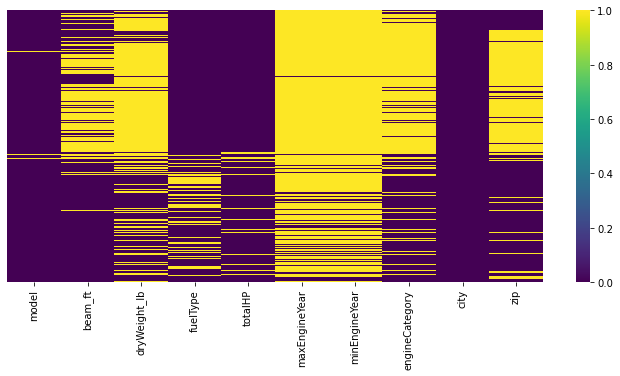

In [10]:
plt.figure(figsize=(12,5))
sns.heatmap(df[cols_with_null].isnull(), yticklabels=False, cbar =True, cmap='viridis')

### >> 3.2 ADVANCE DATA CLEANING 
+ `FOR OBJECT DATA TYPE `
    + DROP COLUMN WITH ATMOST 100 Unique Value
    + IF MISSING VALUE IS LESS THAN 3000, REMOVE THE MISSING VALUE ELSE DROP THE COLUMN
+ `FOR NUMERIC DATA TYPE`
    + IF MISSING VALUE IS UP TO 1000 IN A NUMERIC TYPE COLUMN, DROP THE COLUMN
    + REMOVE ROW WITH MISSING VALUE FOR NUMERIC TYPE

#### >>>>3.2.1 FOR OBJECT DATA TYPE
##### >>>>>> 3.2.1.1 `DROP COLUMN WITH ATMOST 100 Unique Value`

In [11]:
# CHECK FOR COLUMN OBJECT DT 
df_to_drop_col_objType = []
print()
print('+ DROP COLUMN WITH 99 || > unique Value: i.e')
for col in df:
    if df[col].dtypes == 'object' and len(df[col].unique()) >99:
        df_to_drop_col_objType.append(col)

for col in df_to_drop_col_objType:
    print(col, end=' --> consists ')
    print(f'`{len(df[col].unique())}` unique value')     


+ DROP COLUMN WITH 99 || > unique Value: i.e
make --> consists `960` unique value
model --> consists `7900` unique value
city --> consists `1150` unique value
zip --> consists `1047` unique value


make      960
model    7899
city     1149
zip      1046
dtype: int64


<AxesSubplot:>

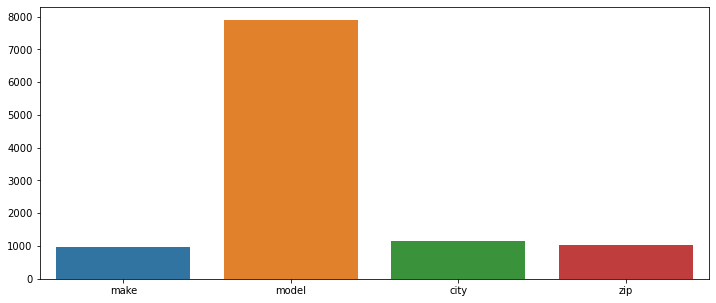

In [12]:
plt.figure(figsize=(12,5))

print(df[df_to_drop_col_objType].nunique())
sns.barplot(x=df_to_drop_col_objType, y=df[df_to_drop_col_objType].nunique().values)

In [13]:
print('DROP ', df_to_drop_col_objType)
df_clean = df.drop(df_to_drop_col_objType, axis=1)
df_clean

DROP  ['make', 'model', 'city', 'zip']


,type,boatClass,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,8.50,3000.0,fiberglass,gasoline,1,150.0,NaN,NaN,outboard-4s,16500.0,217053,FL,2019
1,power,power-sportcruiser,2018,used,40.00,11.00,16100.0,fiberglass,diesel,2,800.0,2018.0,2018.0,inboard-outboard,539000.0,44260,MI,2019
2,power,power-deck,2020,new,18.00,7.42,2000.0,fiberglass,gasoline,1,75.0,2019.0,2019.0,outboard-4s,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,10.33,12650.0,fiberglass,gasoline,2,600.0,NaN,NaN,multiple,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,15.00,32000.0,fiberglass,diesel,2,700.0,1994.0,1994.0,inboard,109900.0,17942,MD,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,power,power-pontoon,2013,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,NaN,31973.0,34647,GA,2019
18899,power,power-runabout,2013,used,19.33,8.00,2795.0,fiberglass,gasoline,1,0.0,NaN,NaN,NaN,26995.0,6335,MI,2019
18900,power,power-bay,2019,new,22.00,7.67,NaN,fiberglass,gasoline,0,NaN,NaN,NaN,NaN,39995.0,65602,TX,2018
18901,power,power-pontoon,2004,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,NaN,16900.0,3180,MO,2019


##### >>>>>> 3.2.1.2  ` IF MISSING VALUE IS LESS THAN 3000, (FILL WITH MOST FREQUENT VALUE) ELSE DROP THE COLUMN` FOR OBJECT DT

In [14]:
# Check object data-type column(s) with missing value
df_nan_obj_col = []
for col in df_clean:
    if df_clean[col].dtypes == 'object' and df_clean[col].isnull().any():
        df_nan_obj_col.append(col)
        print(col.upper())
        print(df_clean[col].isnull().value_counts())
        print()

FUELTYPE
False    15951
True      2952
Name: fuelType, dtype: int64

ENGINECATEGORY
True     10493
False     8410
Name: engineCategory, dtype: int64



<AxesSubplot:>

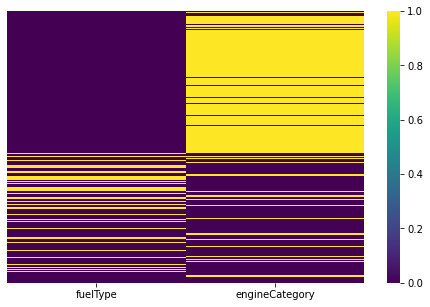

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(df_clean[df_nan_obj_col].isnull(), yticklabels=False, cbar =True, cmap='viridis')

In [16]:
# CHECK MISSING Value for 1st OBJECT(FuelType)

print('Missing Value in ',df_nan_obj_col[0], len(df_clean[df_clean[df_nan_obj_col[0]].isnull()]))
print(df_clean[df_nan_obj_col[0]].unique())
df_clean[df_clean[df_nan_obj_col[0]].isnull()].sample(10)

Missing Value in  fuelType 2952
['gasoline' 'diesel' nan 'other' 'electric']


,type,boatClass,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,state,created_year
12828,power,power-pontoon,2019,new,26.17,8.50,2200.0,aluminum,NaN,1,115.0,NaN,NaN,outboard,35240.0,1250,KS,2019
12468,power,power-jon,2019,new,19.17,7.00,1020.0,aluminum,NaN,1,90.0,NaN,NaN,outboard,20465.0,1078,MO,2019
13901,power,power-aluminum,2019,new,17.58,8.08,1525.0,aluminum,NaN,1,115.0,NaN,NaN,outboard,29015.0,55964,MN,2019
17038,power,power-pontoon,2019,new,24.17,8.50,1920.0,aluminum,NaN,1,90.0,NaN,NaN,outboard,28855.0,55964,MN,2019
12554,power,power-pontoon,2019,new,21.92,8.50,1700.0,aluminum,NaN,1,0.0,NaN,NaN,outboard,26535.0,155353,TX,2018
13030,power,power-aluminum,2019,new,16.00,6.33,875.0,aluminum,NaN,1,50.0,NaN,NaN,outboard,17390.0,1125,OK,2018
11990,power,power-jon,2019,new,14.00,6.00,562.0,aluminum,NaN,1,0.0,NaN,NaN,outboard,4834.0,60577,CA,2018
18443,power,power-skiff,2019,new,19.33,7.75,1900.0,fiberglass,NaN,1,115.0,NaN,NaN,outboard,31050.0,1237,TX,2019
11255,power,power-jon,2019,new,11.92,4.33,126.0,aluminum,NaN,1,0.0,NaN,NaN,outboard,849.0,1003,NY,2018
11857,power,power-jon,2019,new,14.00,6.00,562.0,aluminum,NaN,1,0.0,NaN,NaN,outboard,4494.0,1213,IN,2018


In [17]:
# Fill the missing values with the mode (most frequent value) of the column

mode_fuelType = df_clean['fuelType'].mode()[0]  # Calculate the mode of fuelType
df_clean['fuelType'].fillna(mode_fuelType, inplace=True)  # Fill missing values with the mode
df_clean

,type,boatClass,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,8.50,3000.0,fiberglass,gasoline,1,150.0,NaN,NaN,outboard-4s,16500.0,217053,FL,2019
1,power,power-sportcruiser,2018,used,40.00,11.00,16100.0,fiberglass,diesel,2,800.0,2018.0,2018.0,inboard-outboard,539000.0,44260,MI,2019
2,power,power-deck,2020,new,18.00,7.42,2000.0,fiberglass,gasoline,1,75.0,2019.0,2019.0,outboard-4s,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,10.33,12650.0,fiberglass,gasoline,2,600.0,NaN,NaN,multiple,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,15.00,32000.0,fiberglass,diesel,2,700.0,1994.0,1994.0,inboard,109900.0,17942,MD,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,power,power-pontoon,2013,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,NaN,31973.0,34647,GA,2019
18899,power,power-runabout,2013,used,19.33,8.00,2795.0,fiberglass,gasoline,1,0.0,NaN,NaN,NaN,26995.0,6335,MI,2019
18900,power,power-bay,2019,new,22.00,7.67,NaN,fiberglass,gasoline,0,NaN,NaN,NaN,NaN,39995.0,65602,TX,2018
18901,power,power-pontoon,2004,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,NaN,16900.0,3180,MO,2019


<AxesSubplot:>

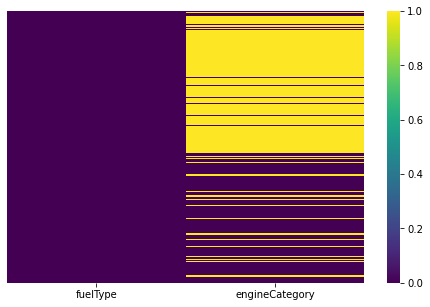

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(df_clean[df_nan_obj_col].isnull(), yticklabels=False, cbar =True, cmap='viridis')

In [19]:
# CHECK NaN Value FOR 2ND OBJECT data-type COLUMN with MISSING Value

print('NaN Value in ',df_nan_obj_col[1], len(df_clean[df_clean[df_nan_obj_col[1]].isnull()]))
print(df_clean[df_nan_obj_col[1]].unique())
df_clean[df_clean[df_nan_obj_col[1]].isnull()].sample(10)

NaN Value in  engineCategory 10493
['outboard-4s' 'inboard-outboard' 'multiple' 'inboard' nan 'outboard'
 'outboard-2s' 'other' 'v-drive' 'electric']


,type,boatClass,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,state,created_year
3035,power,power-pontoon,2019,new,27.00,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,99244.0,27369,MN,2019
2050,power,power-aluminum,2019,new,18.75,7.92,1720.0,aluminum,other,1,0.0,NaN,NaN,NaN,28393.0,12667,WI,2019
8732,power,power-center,2019,used,17.00,7.00,NaN,fiberglass,other,1,0.0,NaN,NaN,NaN,39995.0,5107,NV,2019
8728,power,power-skiwake,2007,used,22.00,NaN,NaN,fiberglass,other,1,0.0,NaN,NaN,NaN,19999.0,6055,FL,2019
2472,power,power-pontoon,2006,used,24.00,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,24999.0,46516,MN,2019
6972,power,power-pontoon,2018,new,25.00,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,136500.0,34588,TN,2018
3011,power,power-pwc,2019,new,132.00,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,10499.0,46516,MN,2019
18367,power,power-inflatable,2018,new,10.80,6.33,NaN,pvc,other,0,NaN,NaN,NaN,NaN,1295.0,27179,WI,2019
17541,power,power-center,2003,used,19.00,7.67,NaN,fiberglass,gasoline,0,NaN,NaN,NaN,NaN,9999.0,32307,GA,2019
6613,power,power-cruiser,2018,used,27.00,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,94997.0,257210,VA,2019


##### The missing Data is greater than the half of the dataset 
    + Drop to avoid data misleading 

In [20]:
# DROP COLUMN
print(df_nan_obj_col[1])
df_clean = df_clean.drop([df_nan_obj_col[1]], axis=1)
df_clean

engineCategory


,type,boatClass,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,8.50,3000.0,fiberglass,gasoline,1,150.0,NaN,NaN,16500.0,217053,FL,2019
1,power,power-sportcruiser,2018,used,40.00,11.00,16100.0,fiberglass,diesel,2,800.0,2018.0,2018.0,539000.0,44260,MI,2019
2,power,power-deck,2020,new,18.00,7.42,2000.0,fiberglass,gasoline,1,75.0,2019.0,2019.0,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,10.33,12650.0,fiberglass,gasoline,2,600.0,NaN,NaN,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,15.00,32000.0,fiberglass,diesel,2,700.0,1994.0,1994.0,109900.0,17942,MD,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,power,power-pontoon,2013,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,31973.0,34647,GA,2019
18899,power,power-runabout,2013,used,19.33,8.00,2795.0,fiberglass,gasoline,1,0.0,NaN,NaN,26995.0,6335,MI,2019
18900,power,power-bay,2019,new,22.00,7.67,NaN,fiberglass,gasoline,0,NaN,NaN,NaN,39995.0,65602,TX,2018
18901,power,power-pontoon,2004,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,16900.0,3180,MO,2019


<AxesSubplot:>

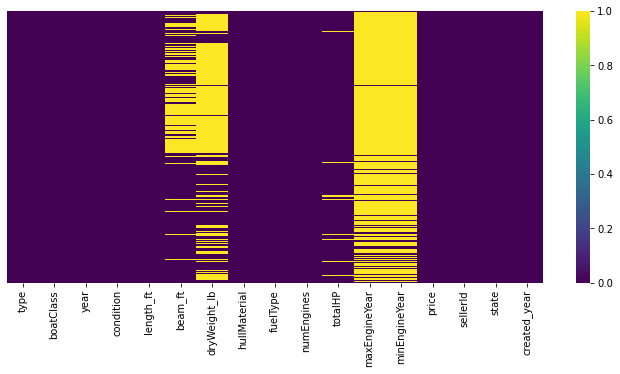

In [21]:
# Preview the missing Column
plt.figure(figsize=(12,5))
sns.heatmap(df_clean.isnull(), yticklabels=False, cbar =True, cmap='viridis')

#### 3.2.2 FOR NUMERIC DATA TYPE
##### >>>>>> 3.2.2.1  `IF MISSING VALUE IS UP TO 1000 IN A NUMERIC TYPE COLUMN, DROP THE COLUMN`

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           18903 non-null  object 
 1   boatClass      18903 non-null  object 
 2   year           18903 non-null  int64  
 3   condition      18903 non-null  object 
 4   length_ft      18903 non-null  float64
 5   beam_ft        12399 non-null  float64
 6   dryWeight_lb   7094 non-null   float64
 7   hullMaterial   18903 non-null  object 
 8   fuelType       18903 non-null  object 
 9   numEngines     18903 non-null  int64  
 10  totalHP        18055 non-null  float64
 11  maxEngineYear  2205 non-null   float64
 12  minEngineYear  2174 non-null   float64
 13  price          18903 non-null  float64
 14  sellerId       18903 non-null  int64  
 15  state          18903 non-null  object 
 16  created_year   18903 non-null  int64  
dtypes: float64(7), int64(4), object(6)
memory usage: 2

In [23]:
# Check `int` or `Float` data-type column(s) with missing value
df_nan_num_col = []
for col in df_clean:
    if (df_clean[col].dtypes == 'float64' or df_clean[col].dtypes == 'int64') and df_clean[col].isnull().any():
        df_nan_num_col.append(col)
        print(col.upper())
        print(df_clean[col].isnull().value_counts())
        print()

BEAM_FT
False    12399
True      6504
Name: beam_ft, dtype: int64

DRYWEIGHT_LB
True     11809
False     7094
Name: dryWeight_lb, dtype: int64

TOTALHP
False    18055
True       848
Name: totalHP, dtype: int64

MAXENGINEYEAR
True     16698
False     2205
Name: maxEngineYear, dtype: int64

MINENGINEYEAR
True     16729
False     2174
Name: minEngineYear, dtype: int64



<AxesSubplot:>

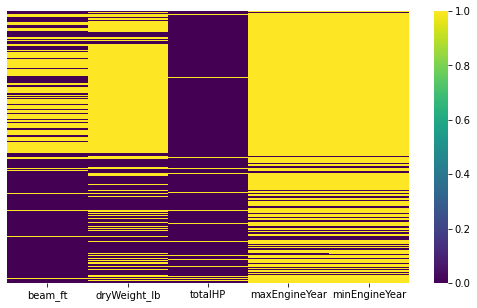

In [24]:
# VISUAL COLUMN WITH MISSING VALUE (in NUMERKIC TYPE)
plt.figure(figsize=(9,5))
sns.heatmap(df[df_nan_num_col].isnull(), yticklabels=False, cbar =True, cmap='viridis')

In [25]:
# EXCLUDE COLUMN THAT DOES NOT HAVE UPTO 1,000 MISSING VALUE
df_nan_to_drop_num_col = [col for col in df_nan_num_col if col != 'totalHP']
df_nan_to_drop_num_col

['beam_ft', 'dryWeight_lb', 'maxEngineYear', 'minEngineYear']

In [26]:
# DROP COLUMN THAT HAVE MORE THAN 1,000 MISSING VALUE
print('DROP ', df_nan_to_drop_num_col)
df_clean = df_clean.drop(df_nan_to_drop_num_col, axis=1)
#df_clean.drop(df_nan_num_col, axis=1, inplace=True)
df_clean

DROP  ['beam_ft', 'dryWeight_lb', 'maxEngineYear', 'minEngineYear']


,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,fiberglass,gasoline,1,150.0,16500.0,217053,FL,2019
1,power,power-sportcruiser,2018,used,40.00,fiberglass,diesel,2,800.0,539000.0,44260,MI,2019
2,power,power-deck,2020,new,18.00,fiberglass,gasoline,1,75.0,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,fiberglass,gasoline,2,600.0,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,fiberglass,diesel,2,700.0,109900.0,17942,MD,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,power,power-pontoon,2013,used,25.00,aluminum,gasoline,0,NaN,31973.0,34647,GA,2019
18899,power,power-runabout,2013,used,19.33,fiberglass,gasoline,1,0.0,26995.0,6335,MI,2019
18900,power,power-bay,2019,new,22.00,fiberglass,gasoline,0,NaN,39995.0,65602,TX,2018
18901,power,power-pontoon,2004,used,25.00,aluminum,gasoline,0,NaN,16900.0,3180,MO,2019


In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          18903 non-null  object 
 1   boatClass     18903 non-null  object 
 2   year          18903 non-null  int64  
 3   condition     18903 non-null  object 
 4   length_ft     18903 non-null  float64
 5   hullMaterial  18903 non-null  object 
 6   fuelType      18903 non-null  object 
 7   numEngines    18903 non-null  int64  
 8   totalHP       18055 non-null  float64
 9   price         18903 non-null  float64
 10  sellerId      18903 non-null  int64  
 11  state         18903 non-null  object 
 12  created_year  18903 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1.9+ MB


 ##### >>>>>> 3.2.2.1  `IF MISSING VALUE IS LESS THAN 1000 IN A NUMERIC TYPE COLUMN, REMOVE NaN ROW`

In [28]:
df_clean = df_clean[df_clean['totalHP'].notnull()]
df_clean

,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,fiberglass,gasoline,1,150.0,16500.0,217053,FL,2019
1,power,power-sportcruiser,2018,used,40.00,fiberglass,diesel,2,800.0,539000.0,44260,MI,2019
2,power,power-deck,2020,new,18.00,fiberglass,gasoline,1,75.0,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,fiberglass,gasoline,2,600.0,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,fiberglass,diesel,2,700.0,109900.0,17942,MD,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,power,power-house,2005,used,100.00,aluminum,gasoline,2,0.0,425000.0,34888,KY,2018
18896,power,power-center,1990,used,28.00,fiberglass,diesel,1,315.0,49000.0,61420,FL,2019
18897,power,power-pilot,1973,used,29.00,other,gasoline,1,0.0,10000.0,32168,GA,2017
18899,power,power-runabout,2013,used,19.33,fiberglass,gasoline,1,0.0,26995.0,6335,MI,2019


<AxesSubplot:>

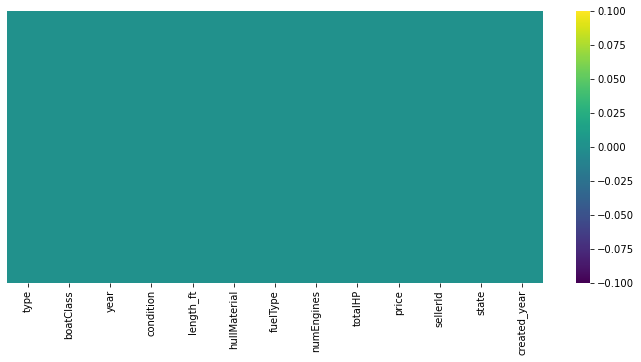

In [29]:
plt.figure(figsize=(12,5))
sns.heatmap(df_clean.isnull(), yticklabels=False, cbar =True, cmap='viridis')

## 4.0 EXPLORATORY DATA ANALYSIS (EDA) 

### >> 4.1 DATA EXPLORATORY
+ Detect Outlier From numeric Column (Price, length_ft, etc)

In [30]:
# Check `int` or `Float` data-type column(s) 
for col in df_clean:
    if (df_clean[col].dtypes == 'float64' or df_clean[col].dtypes == 'int64'):
        print(col)

year
length_ft
numEngines
totalHP
price
sellerId
created_year


In [31]:
#sns.pairplot(df_clean)
#df_clean.corr()
#df_clean.drop('sellerId', axis=1, inplace=True )
df_clean.corr()

,year,length_ft,numEngines,totalHP,price,sellerId,created_year
year,1.000000,-0.222239,-0.300089,-0.194967,-0.028056,0.065940,0.275208
length_ft,-0.222239,1.000000,0.351975,0.357813,0.343944,-0.057879,-0.118081
numEngines,-0.300089,0.351975,1.000000,0.625390,0.366473,-0.084159,-0.244772
totalHP,-0.194967,0.357813,0.625390,1.000000,0.589721,-0.024495,-0.213557
price,-0.028056,0.343944,0.366473,0.589721,1.000000,-0.016534,-0.099106
sellerId,0.065940,-0.057879,-0.084159,-0.024495,-0.016534,1.000000,0.060988
created_year,0.275208,-0.118081,-0.244772,-0.213557,-0.099106,0.060988,1.000000


#### >>>> 4.1.1 CHECK FOR PRICE OUTLIER 

In [37]:
#sns.boxplot(x='price', y='length_ft', data=df_clean)

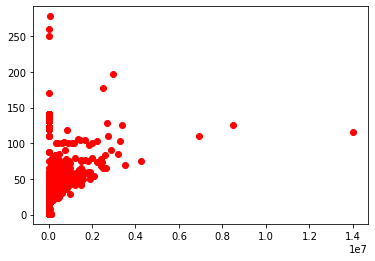

In [33]:
plt.scatter(df_clean['price'], df_clean['length_ft'], color = 'red')

In [34]:
# Remove record with 5,000,000 up ward
print('min price', df_clean['price'].min())
print('MAX Price', df_clean['price'].max())

min price 500.0
MAX Price 14000000.0


<Figure size 1224x648 with 0 Axes>

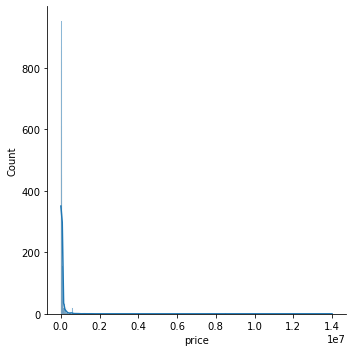

In [35]:
plt.figure(figsize=(17,9))
sns.displot(df_clean['price'], kde=True)

<Figure size 1224x648 with 0 Axes>

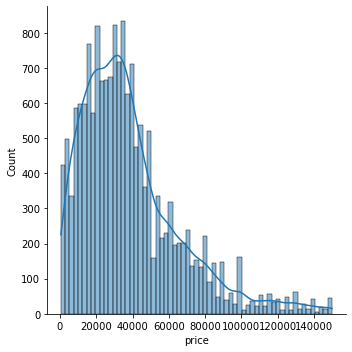

In [36]:
plt.figure(figsize=(17,9))
sns.displot(df_clean[(df_clean['price']<150000)]['price'], kde=True)

#### `>>>>>> REMOVE THE OUTLIER (SET MAX PRICE TO `150,000`)`

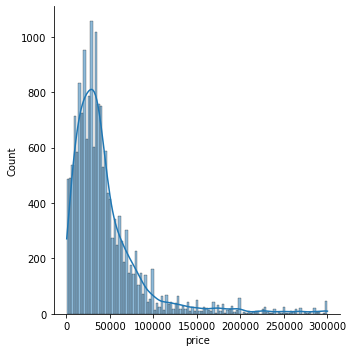

In [38]:
# Remove record with 5,000,000 up ward
#df_clean_outlier =df_clean[(df_clean['price'] < 5000000)]  # 5m
#df_clean_outlier =df_clean[(df_clean['price'] < 2000000)]  #2m
#df_clean_outlier =df_clean[(df_clean['price'] < 1000000)]  #1m
#df_clean_outlier =df_clean[(df_clean['price'] < 999999)]   #1m -1
#df_clean_outlier =df_clean[(df_clean['price'] < 500000)]   #500k
#df_clean_outlier =df_clean[(df_clean['price'] < 400000)]   #400k
df_clean_outlier = df_clean[(df_clean['price']<300000)]   #300k
#df_clean_outlier = df_clean[(df_clean['price']<200000)]   #200k
#df_clean_outlier = df_clean[(df_clean['price']<150000)]   #150k


sns.displot(df_clean_outlier['price'], kde=True)

In [39]:
# Cross Check
print('min price', df_clean_outlier['price'].min())
print('MAX Price', df_clean_outlier['price'].max())
print('Lenght', df_clean_outlier.shape)
df_clean_outlier.sort_values('price',  ascending=False).head(20)

min price 500.0
MAX Price 299999.0
Lenght (17575, 13)


,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
3339,power,power-house,2004,used,84.00,other,other,1,0.0,299999.0,29402,MO,2019
16160,power,power-cruiser,2015,used,38.50,fiberglass,gasoline,1,430.0,299995.0,35188,OH,2019
16383,power,power-cuddy,2018,used,33.00,fiberglass,gasoline,2,600.0,299995.0,14386,FL,2019
16531,power,power-cruiser,2017,new,36.00,fiberglass,gasoline,2,760.0,299948.0,14353,WI,2016
13209,power,power-center,2019,new,33.33,fiberglass,gasoline,2,0.0,299900.0,1176,VA,2018
13163,power,power-center,2019,new,33.33,fiberglass,gasoline,2,0.0,299900.0,1102,FL,2018
13169,power,power-center,2019,new,33.33,fiberglass,gasoline,2,0.0,299900.0,1107,NC,2018
13174,power,power-center,2019,new,33.33,fiberglass,gasoline,2,0.0,299900.0,1110,TX,2018
13179,power,power-center,2019,new,33.33,fiberglass,gasoline,2,0.0,299900.0,1114,TX,2018
17208,power,power-center,2018,used,29.00,fiberglass,gasoline,2,600.0,299900.0,6654,MA,2019


In [40]:
df_clean_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17575 entries, 0 to 18902
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          17575 non-null  object 
 1   boatClass     17575 non-null  object 
 2   year          17575 non-null  int64  
 3   condition     17575 non-null  object 
 4   length_ft     17575 non-null  float64
 5   hullMaterial  17575 non-null  object 
 6   fuelType      17575 non-null  object 
 7   numEngines    17575 non-null  int64  
 8   totalHP       17575 non-null  float64
 9   price         17575 non-null  float64
 10  sellerId      17575 non-null  int64  
 11  state         17575 non-null  object 
 12  created_year  17575 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1.9+ MB


In [41]:
df_clean_outlier.corr()

,year,length_ft,numEngines,totalHP,price,sellerId,created_year
year,1.000000,-0.209106,-0.383953,-0.243446,-0.002013,0.067254,0.277788
length_ft,-0.209106,1.000000,0.281093,0.211712,0.272732,-0.055802,-0.087105
numEngines,-0.383953,0.281093,1.000000,0.604972,0.446067,-0.079950,-0.265331
totalHP,-0.243446,0.211712,0.604972,1.000000,0.420166,-0.028428,-0.232177
price,-0.002013,0.272732,0.446067,0.420166,1.000000,-0.012126,-0.103600
sellerId,0.067254,-0.055802,-0.079950,-0.028428,-0.012126,1.000000,0.059163
created_year,0.277788,-0.087105,-0.265331,-0.232177,-0.103600,0.059163,1.000000


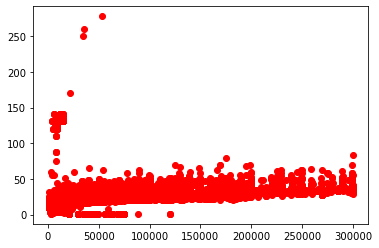

In [42]:
plt.scatter(df_clean_outlier['price'], df_clean_outlier['length_ft'], color = 'red')

#### >>>> 4.1.2 CHECK FOR LENGHT_FT OUTLIER 

In [43]:
print(df_clean_outlier['length_ft'].min())
df_clean_outlier['length_ft'].max()

1.0


277.9

#### `>>>>>> REMOVE THE OUTLIER (SET MAX LENGHT_FT TO `100`)`

In [44]:
df_clean_outlier =df_clean_outlier[(df_clean_outlier['length_ft'] < 70)]
print('min length_ft', df_clean_outlier['length_ft'].min())
print('MAX length_ft', df_clean_outlier['length_ft'].max())
print('Lenght', len(df_clean_outlier))
df_clean_outlier.sort_values('length_ft',  ascending=False).head(20)

min length_ft 1.0
MAX length_ft 68.0
Lenght 17395


,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
14698,power,power-motor,1990,used,68.00,fiberglass,diesel,2,970.0,195000.0,18223,MD,2015
16625,power,power-house,1991,used,67.00,steel,gasoline,2,540.0,129900.0,56775,AZ,2018
11224,power,power-motor,1995,used,65.00,steel,diesel,2,574.0,149000.0,28309,TX,2018
12555,power,power-house,2014,new,65.00,aluminum,gasoline,2,440.0,39900.0,34439,AZ,2017
7563,power,power-motor,1991,used,64.00,fiberglass,other,1,0.0,259000.0,34373,PA,2017
12109,power,power-house,1978,used,63.00,aluminum,gasoline,2,330.0,89500.0,34888,KY,2019
15666,power,power-house,1999,used,63.00,aluminum,gasoline,1,140.0,166750.0,61430,WA,2012
13554,power,power-motor,1988,used,63.00,fiberglass,diesel,2,1300.0,249000.0,63935,FL,2017
5423,power,power-center,2019,new,62.50,fiberglass,gasoline,1,0.0,53837.0,35234,AL,2019
14017,power,power-flybridge,1999,used,62.00,aluminum,diesel,2,1400.0,250000.0,28311,MA,2017


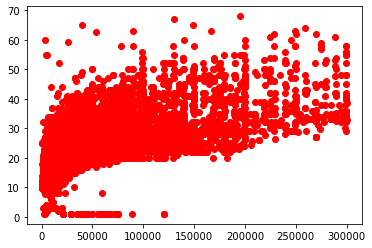

In [45]:
plt.scatter(df_clean_outlier['price'], df_clean_outlier['length_ft'], color = 'red')

In [46]:
df_clean_outlier[(df_clean_outlier['length_ft'] <= 2)]

,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
2286,power,power-pontoon,2020,new,1.0,other,other,1,0.0,45020.0,46516,MN,2019
2314,power,power-pontoon,2019,new,1.0,other,other,1,0.0,29352.0,46516,MN,2019
2315,power,power-pontoon,2020,new,1.0,other,other,1,0.0,45020.0,46516,MN,2019
2331,power,power-pontoon,2020,new,1.0,other,other,1,0.0,67690.0,46516,MN,2019
2340,power,power-pontoon,2018,new,1.0,other,other,1,0.0,37999.0,46516,MN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10414,power,power-other,2016,used,2.0,other,gasoline,1,25.0,4899.0,57749,TX,2016
11275,power,power-other,2015,used,2.0,other,other,1,250.0,15995.0,1196,SC,2016
15438,power,power-other,2011,used,2.0,other,gasoline,1,150.0,4985.0,28292,FL,2017
16170,power,power-other,2015,used,1.0,other,gasoline,1,15.0,2750.0,5109,IL,2019


#### >>>> 4.1.3 CHECK FOR NUMENGINES OUTLIER 

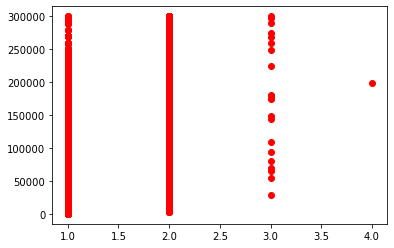

In [47]:
plt.scatter(df_clean_outlier['numEngines'], df_clean_outlier['price'], color = 'red')

#### `>>>>>> REMOVE THE OUTLIER (SET MAX_NO OF NUMENGINES TO `2`)`

In [48]:
df_clean_outlier = df_clean_outlier[df_clean_outlier['numEngines'] < 3]
df_clean_outlier

,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,fiberglass,gasoline,1,150.0,16500.0,217053,FL,2019
2,power,power-deck,2020,new,18.00,fiberglass,gasoline,1,75.0,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,fiberglass,gasoline,2,600.0,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,fiberglass,diesel,2,700.0,109900.0,17942,MD,2018
9,power,power-convertible,1971,used,42.00,fiberglass,diesel,2,840.0,59500.0,16876,CT,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18894,power,power-pontoon,2017,new,22.33,aluminum,gasoline,1,90.0,37631.0,5103,MI,2016
18896,power,power-center,1990,used,28.00,fiberglass,diesel,1,315.0,49000.0,61420,FL,2019
18897,power,power-pilot,1973,used,29.00,other,gasoline,1,0.0,10000.0,32168,GA,2017
18899,power,power-runabout,2013,used,19.33,fiberglass,gasoline,1,0.0,26995.0,6335,MI,2019


#### >>>> 4.1.3 CHECK FOR TOTALHP OUTLIER 

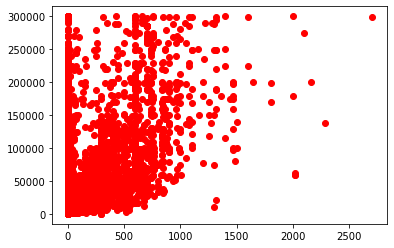

In [49]:
plt.scatter(df_clean_outlier['totalHP'], df_clean_outlier['price'], color = 'red')

In [50]:
print(df_clean_outlier['totalHP'].min())
df_clean_outlier['totalHP'].max()

0.0


2700.0

In [51]:
df_clean_outlier[(df_clean_outlier['totalHP'] < 400) & (df_clean_outlier['totalHP'] > -1)]

,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,fiberglass,gasoline,1,150.0,16500.0,217053,FL,2019
2,power,power-deck,2020,new,18.00,fiberglass,gasoline,1,75.0,26995.0,220570,OH,2019
11,sail,sail-racercruiser,1986,used,30.00,fiberglass,diesel,1,0.0,25500.0,16876,CT,2011
12,power,power-pontoon,2019,new,23.70,aluminum,gasoline,1,200.0,44507.0,34914,DE,2019
13,power,power-motor,2000,used,55.00,fiberglass,diesel,2,0.0,299000.0,6123,FL,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18894,power,power-pontoon,2017,new,22.33,aluminum,gasoline,1,90.0,37631.0,5103,MI,2016
18896,power,power-center,1990,used,28.00,fiberglass,diesel,1,315.0,49000.0,61420,FL,2019
18897,power,power-pilot,1973,used,29.00,other,gasoline,1,0.0,10000.0,32168,GA,2017
18899,power,power-runabout,2013,used,19.33,fiberglass,gasoline,1,0.0,26995.0,6335,MI,2019


#### `>>>>>> REMOVE THE OUTLIER (SET MAX_NO OF TOTALHP TO `399` and MIN_NO TO 0)`

In [52]:
df_clean_outlier =df_clean_outlier[(df_clean_outlier['totalHP'] < 400) & (df_clean_outlier['totalHP'] > -1)]
print('min totalHP', df_clean_outlier['totalHP'].min())
print('MAX totalHP', df_clean_outlier['totalHP'].max())
print('Lenght', len(df_clean_outlier))
df_clean_outlier.sort_values('totalHP',  ascending=False).head(10)

min totalHP 0.0
MAX totalHP 385.0
Lenght 16383


,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
17088,power,power-runabout,2005,used,28.67,fiberglass,gasoline,1,385.0,31900.0,5913,NJ,2019
11181,power,power-sportcruiser,1996,used,28.00,fiberglass,gasoline,2,380.0,23500.0,16863,NY,2018
18821,power,power-bowrider,2015,used,28.00,fiberglass,gasoline,1,380.0,94800.0,67460,FL,2019
12782,power,power-bowrider,2013,used,27.00,fiberglass,gasoline,1,380.0,84500.0,17929,NJ,2019
70,power,power-skiwake,2015,used,24.50,fiberglass,gasoline,1,380.0,84900.0,34745,MO,2019
12886,power,power-bowrider,2018,new,27.00,fiberglass,gasoline,1,380.0,179999.0,42094,MD,2017
15556,power,power-cruiser,1998,used,29.00,fiberglass,gasoline,2,380.0,33900.0,21445,NY,2019
14400,power,power-skiwake,2019,new,27.00,fiberglass,gasoline,1,380.0,199685.0,223836,WI,2018
18818,power,power-other,2017,used,28.00,fiberglass,gasoline,1,380.0,147900.0,44163,CT,2019
18561,power,power-highperf,1998,used,24.00,fiberglass,gasoline,1,380.0,21000.0,27207,TN,2019


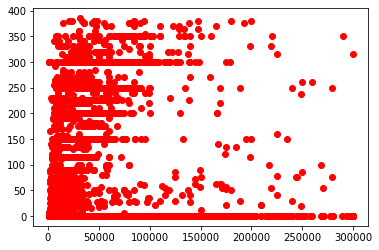

In [53]:
plt.scatter(df_clean_outlier['price'], df_clean_outlier['totalHP'], color = 'red')

In [54]:
#plt.scatter(df_clean_outlier['year'], df_clean_outlier['price'], color = 'red')

In [55]:
df_clean_outlier.corr()

,year,length_ft,numEngines,totalHP,price,sellerId,created_year
year,1.000000,-0.375466,-0.285977,0.024782,0.102996,0.063617,0.242935
length_ft,-0.375466,1.000000,0.400038,0.075594,0.571832,-0.049062,-0.158062
numEngines,-0.285977,0.400038,1.000000,0.003977,0.251977,-0.081409,-0.197148
totalHP,0.024782,0.075594,0.003977,1.000000,0.039556,-0.002628,-0.150612
price,0.102996,0.571832,0.251977,0.039556,1.000000,-0.002543,-0.024856
sellerId,0.063617,-0.049062,-0.081409,-0.002628,-0.002543,1.000000,0.051828
created_year,0.242935,-0.158062,-0.197148,-0.150612,-0.024856,0.051828,1.000000


In [56]:
#sns.pairplot(df_clean_outlier)

In [57]:
#sns.pairplot(df_clean_outlier)
#plt.figure(figsize=(12,5))
#sns.heatmap(train.isnull(), yticklabels=False, cbar =True, cmap='viridis')

<Figure size 1008x504 with 0 Axes>

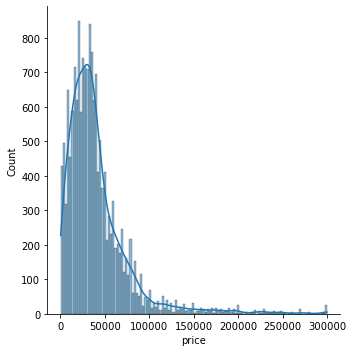

In [58]:
plt.figure(figsize=(14,7))

sns.displot(df_clean_outlier['price'], kde=True)

In [59]:
df_clean_outlier

,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,fiberglass,gasoline,1,150.0,16500.0,217053,FL,2019
2,power,power-deck,2020,new,18.00,fiberglass,gasoline,1,75.0,26995.0,220570,OH,2019
11,sail,sail-racercruiser,1986,used,30.00,fiberglass,diesel,1,0.0,25500.0,16876,CT,2011
12,power,power-pontoon,2019,new,23.70,aluminum,gasoline,1,200.0,44507.0,34914,DE,2019
13,power,power-motor,2000,used,55.00,fiberglass,diesel,2,0.0,299000.0,6123,FL,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18894,power,power-pontoon,2017,new,22.33,aluminum,gasoline,1,90.0,37631.0,5103,MI,2016
18896,power,power-center,1990,used,28.00,fiberglass,diesel,1,315.0,49000.0,61420,FL,2019
18897,power,power-pilot,1973,used,29.00,other,gasoline,1,0.0,10000.0,32168,GA,2017
18899,power,power-runabout,2013,used,19.33,fiberglass,gasoline,1,0.0,26995.0,6335,MI,2019


In [60]:
#sns.jointplot( x='fico', y='int.rate', data=df,)

In [61]:
#plt.figure(figsize=(11,7))
#sns.lmplot(y='int.rate',x='fico',data=df_clean_outlier, hue='credit.policy',
 #          col='not.fully.paid', palette='Set1')

In [62]:
0,3,5,6,
1,11

(1, 11)

## 5.0 TRANSFORMATION

In [63]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

In [64]:
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder, [0,3,5,6])],  remainder='passthrough')
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,3,5,6])], remainder='passthrough')
#df_clean_outlier_transform = ct.fit_transform(df_clean_outlier)
#X = np.array(ct.fit_transform(X))

#### DIMENSIONAL REDUCTION

In [65]:
from sklearn.decomposition import PCA

In [66]:
# to select the number of n_component
for col in df_clean_outlier:
    if df[col].dtypes == 'object':
        print(col)

type
boatClass
condition
hullMaterial
fuelType
state


In [67]:
# Check for Object type column, get there dummies values, reduce there demensionality to 1, 
df_transformed_pca = pd.DataFrame()
for col in df_clean_outlier:
    # Check for obj type
    if df[col].dtypes == 'object': 
        dummy_val = pd.get_dummies(df_clean_outlier[col])
        # Reduce the demension to 1
        pca = PCA(n_components=1)
        pca_value = pca.fit_transform(dummy_val)
        
        pca_value = pd.DataFrame(pca_value, columns=[col+'_pca'])    # Convert the numpy data to DataFrame series        
        df_transformed_pca = pd.concat([df_transformed_pca, pca_value], axis=1)  # Add to existing df
df_transformed_pca        

,type_pca,boatClass_pca,condition_pca,hullMaterial_pca,fuelType_pca,state_pca
0,-0.017634,-0.257808,0.907935,0.750177,0.979046,0.877958
1,-0.017634,-0.234319,-0.506279,0.750177,0.979046,-0.083853
2,1.395879,-0.185880,0.907935,0.750177,0.291670,-0.080134
3,-0.017634,0.781600,-0.506279,-0.443088,0.979046,-0.074593
4,-0.017634,-0.189224,0.907935,0.750177,0.291670,0.877958
...,...,...,...,...,...,...
16378,-0.017634,0.781600,-0.506279,-0.443088,0.979046,-0.243734
16379,-0.017634,-0.257808,0.907935,0.750177,0.291670,0.877958
16380,-0.017634,-0.185179,0.907935,-0.503787,0.979046,-0.103041
16381,-0.017634,-0.203617,0.907935,0.750177,0.979046,-0.243734


In [68]:
# Set the index of df_transformed_pca to match the index of df_clean_outlier

df_transformed_pca.index = df_clean_outlier.index

In [69]:
df_transformed_pca.tail(3)

,type_pca,boatClass_pca,condition_pca,hullMaterial_pca,fuelType_pca,state_pca
18897,-0.017634,-0.185179,0.907935,-0.503787,0.979046,-0.103041
18899,-0.017634,-0.203617,0.907935,0.750177,0.979046,-0.243734
18902,-0.017634,-0.254576,-0.506279,0.750177,0.979046,-0.103041


In [70]:
df_clean_outlier_transformed = pd.concat([df_clean_outlier, df_transformed_pca ], axis=1)
df_clean_outlier_transformed.drop(['type', 'condition', 'hullMaterial', 'fuelType', 'boatClass', 'state'], axis=1, inplace=True)
df_clean_outlier_transformed

,year,length_ft,numEngines,totalHP,price,sellerId,created_year,type_pca,boatClass_pca,condition_pca,hullMaterial_pca,fuelType_pca,state_pca
0,1992,21.00,1,150.0,16500.0,217053,2019,-0.017634,-0.257808,0.907935,0.750177,0.979046,0.877958
2,2020,18.00,1,75.0,26995.0,220570,2019,-0.017634,-0.234319,-0.506279,0.750177,0.979046,-0.083853
11,1986,30.00,1,0.0,25500.0,16876,2011,1.395879,-0.185880,0.907935,0.750177,0.291670,-0.080134
12,2019,23.70,1,200.0,44507.0,34914,2019,-0.017634,0.781600,-0.506279,-0.443088,0.979046,-0.074593
13,2000,55.00,2,0.0,299000.0,6123,2013,-0.017634,-0.189224,0.907935,0.750177,0.291670,0.877958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18894,2017,22.33,1,90.0,37631.0,5103,2016,-0.017634,0.781600,-0.506279,-0.443088,0.979046,-0.243734
18896,1990,28.00,1,315.0,49000.0,61420,2019,-0.017634,-0.257808,0.907935,0.750177,0.291670,0.877958
18897,1973,29.00,1,0.0,10000.0,32168,2017,-0.017634,-0.185179,0.907935,-0.503787,0.979046,-0.103041
18899,2013,19.33,1,0.0,26995.0,6335,2019,-0.017634,-0.203617,0.907935,0.750177,0.979046,-0.243734


##  6.0 MODEL AND EVALUATION

+ Let's start by splitting our data into a training set and test set

### Splitting the dataset into the Training set and Test set

In [71]:
df_clean_outlier_transformed.shape

(16383, 13)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = df_clean_outlier_transformed.drop('price', axis=1)
y = df_clean_outlier_transformed['price']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train using Linear Regression 

In [75]:
from sklearn.linear_model import LinearRegression

ln_regressor = LinearRegression()
ln_regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
ln_predictions = ln_regressor.predict(X_test)

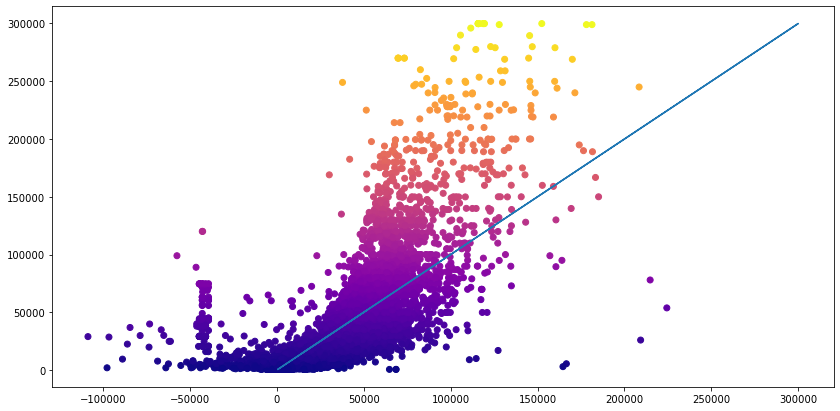

In [80]:
plt.figure(figsize=(14,7))

plt.scatter(ln_regressor.predict(X_train), y_train, c=y_train, cmap='plasma')
plt.plot(y_train, y_train, )
#plt.scatter(ln_predictions, y_test, color = 'green')

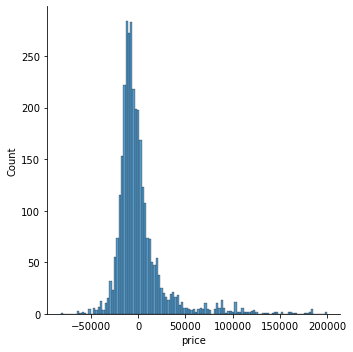

In [81]:
sns.displot((y_test - ln_predictions))

In [82]:
from sklearn import metrics

In [83]:
metrics.mean_absolute_error(y_test, ln_predictions)

16750.030399701525

In [84]:
from sklearn.metrics import r2_score, adjusted_rand_score
r2_score(y_train, ln_regressor.predict(X_train)), r2_score(y_test, ln_predictions)

(0.4840999511126901, 0.4632075629433322)

## Train using SVR model 

In [85]:
#### NORMALIZATION

In [86]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_X_train = sc_X.fit_transform(X_train)

sc_y_train = sc_y.fit_transform(y_train.values.reshape(len(y_train), -1))
sc_y_train

array([[-0.71927243],
       [-0.71645079],
       [-0.40903156],
       ...,
       [ 1.37617347],
       [-0.65429086],
       [ 0.31735951]])

In [87]:
### Import SVM library
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(sc_X_train, sc_y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [88]:
svm_y_pred = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(X_test)).reshape(len(y_test), -1))
svm_y_train =sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(X_train)).reshape(len(X_train), -1))
np.set_printoptions(precision=2)

#y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [89]:
svm_y_pred

array([[39230.1 ],
       [62686.64],
       [47447.55],
       ...,
       [52907.13],
       [14343.28],
       [15495.39]])

In [90]:
r2_score(y_train, svm_y_train), r2_score(y_test, svm_y_pred)

(0.7697508739636432, 0.7485459889347739)

## Train using DECISION TREE 

In [91]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()

In [92]:
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [93]:
decsn_tree_pred = decision_regressor.predict(X_test)
decsn_tree_pred

array([49995.  , 72969.71, 38715.  , ..., 40249.  , 20579.  , 19195.  ])

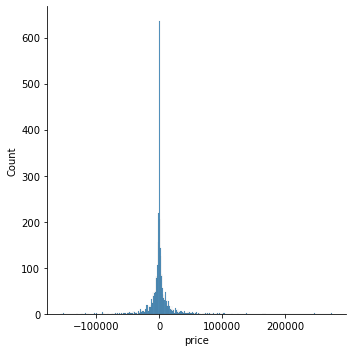

In [94]:
sns.displot((y_test - decsn_tree_pred))

In [95]:
metrics.mean_absolute_error(y_test, decsn_tree_pred)

8880.63495835723

In [96]:
r2_score(y_train,  decision_regressor.predict(X_train)), r2_score(y_test, decsn_tree_pred)

(0.9772532732488435, 0.7447688390219467)

## Train using RANDOM FOREST 

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
# Iterate and test different possible n_estimators number
rand_predicitions = []
for i in range(4, 49):
    rand_regressor = RandomForestRegressor(n_estimators=i, random_state=42)
    rand_regressor.fit(X_train, y_train)
    pred = rand_regressor.predict(X_test)
    rand_predicitions.append(r2_score(y_test, pred))
    
rand_predicitions 

[0.8333741991339522,
 0.8331390876238987,
 0.8394307959232685,
 0.8416464786812291,
 0.8434282317046357,
 0.8456075525347521,
 0.8444608225859072,
 0.846152351786961,
 0.8444214453543895,
 0.8463054282370807,
 0.8479620595431258,
 0.8484919683435462,
 0.8491791295448785,
 0.848318158065587,
 0.8482117323687759,
 0.8477871935543554,
 0.8482394373958391,
 0.8495887460717474,
 0.8495217667208936,
 0.8501932214533814,
 0.849405248221873,
 0.850434247044846,
 0.8508780261229767,
 0.8511656464303794,
 0.8506568864463138,
 0.8500283007524013,
 0.8509352884679647,
 0.8513126387852852,
 0.8511528087897265,
 0.851415789099875,
 0.8517011325370057,
 0.8513934174845255,
 0.8519562336137362,
 0.8521804358487273,
 0.8525488914199715,
 0.852232260003172,
 0.8528257803056335,
 0.8525030768260736,
 0.8525566865733942,
 0.8529478944368509,
 0.853018743441785,
 0.8527169637569818,
 0.8532188738863415,
 0.853430437329308,
 0.853472306271121]

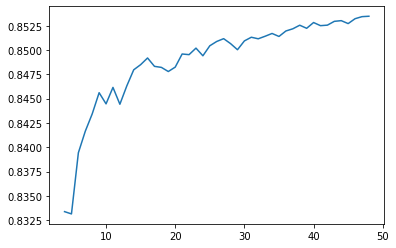

In [99]:
# Plot the prediction witht there respective number for better visualization
plt.plot(range(4, 49), rand_predicitions)

In [100]:
## Using 26 as n_estimators
rand_regressor = RandomForestRegressor(n_estimators=44,random_state=42)
rand_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=44, random_state=42)

In [101]:
random_prediction = rand_regressor.predict(X_test)
random_prediction

array([42068.19, 72820.29, 39697.71, ..., 43692.4 , 25073.31, 19507.39])

In [102]:
r2_score(y_train,  rand_regressor.predict(X_train)), r2_score(y_test, random_prediction)

(0.9570570934269003, 0.853018743441785)

In [103]:
metrics.mean_absolute_error(y_test, random_prediction)

7299.62887195792